### PROBLEM STATEMENT: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

##### Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading data set
data = pd.read_csv(r'C:\Users\naksh\Downloads\Prodigy Intership\Prob3\bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


##### Basic checks

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
data.duplicated().sum()

0

### EDA

In [11]:
# for univariate analysis
import sweetviz as sv

report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
# numerical columns
data1 = data[['age','balance','day','duration','campaign','pdays','previous']]

In [13]:
# categorical columns
data2 = data[['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']]

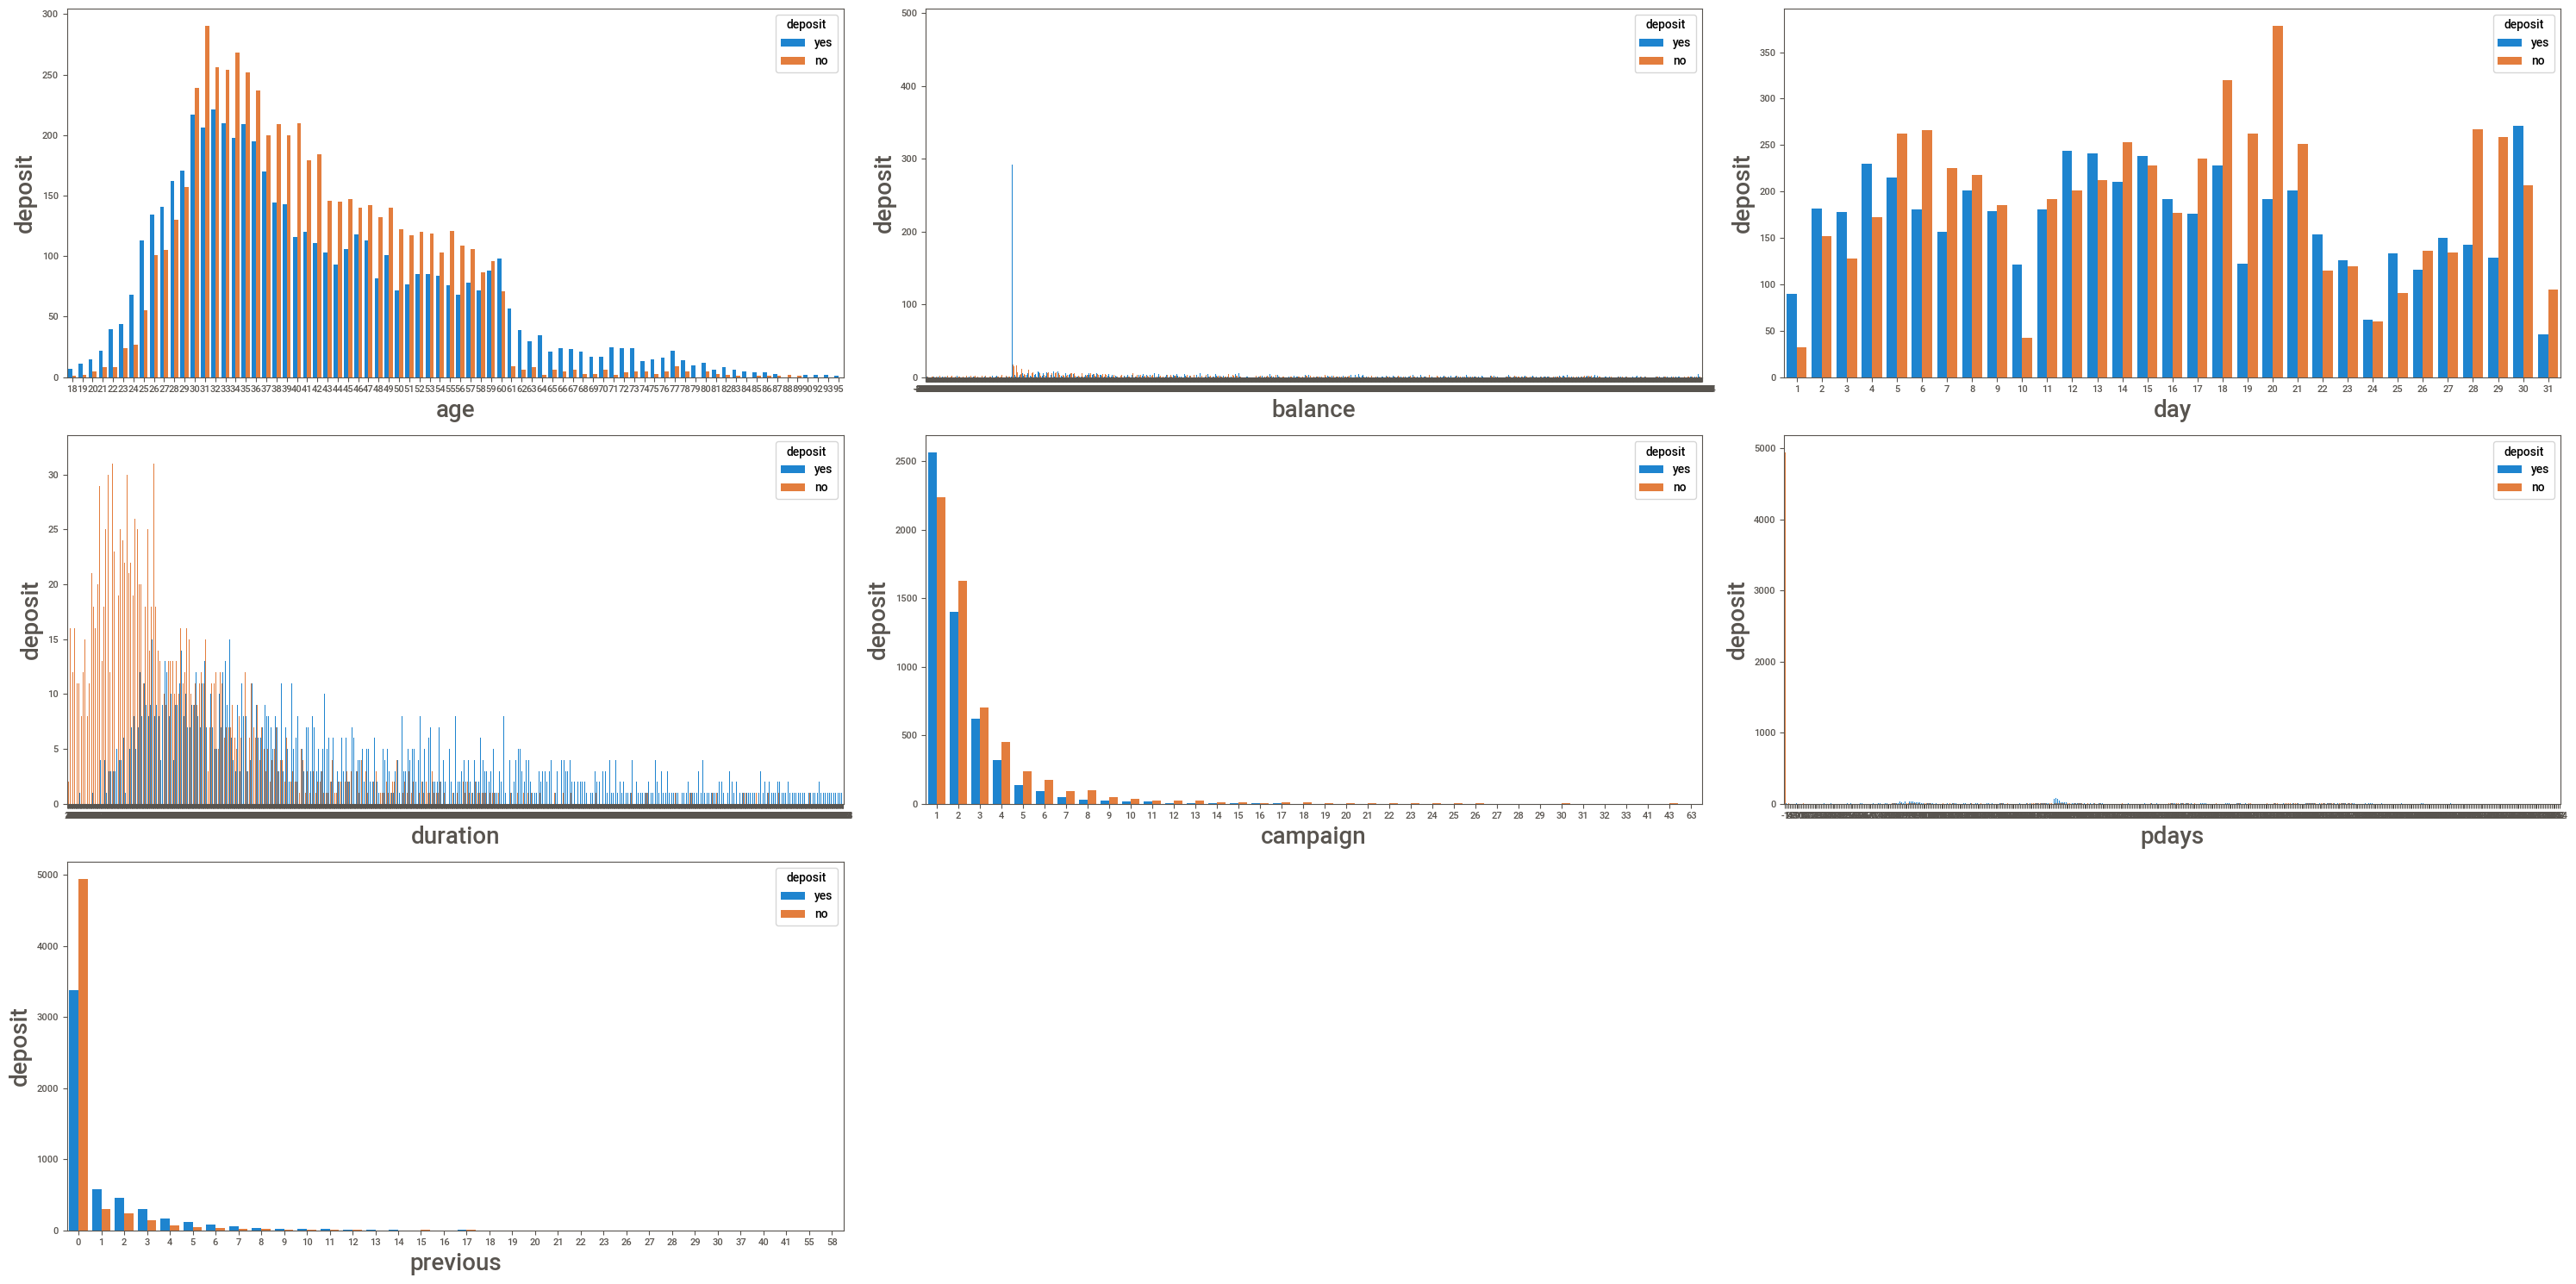

In [14]:
# Bivariate analysis for numerical columns

plt.figure(figsize=(30,15),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=16:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=data1[column],hue=data.deposit)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('deposit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

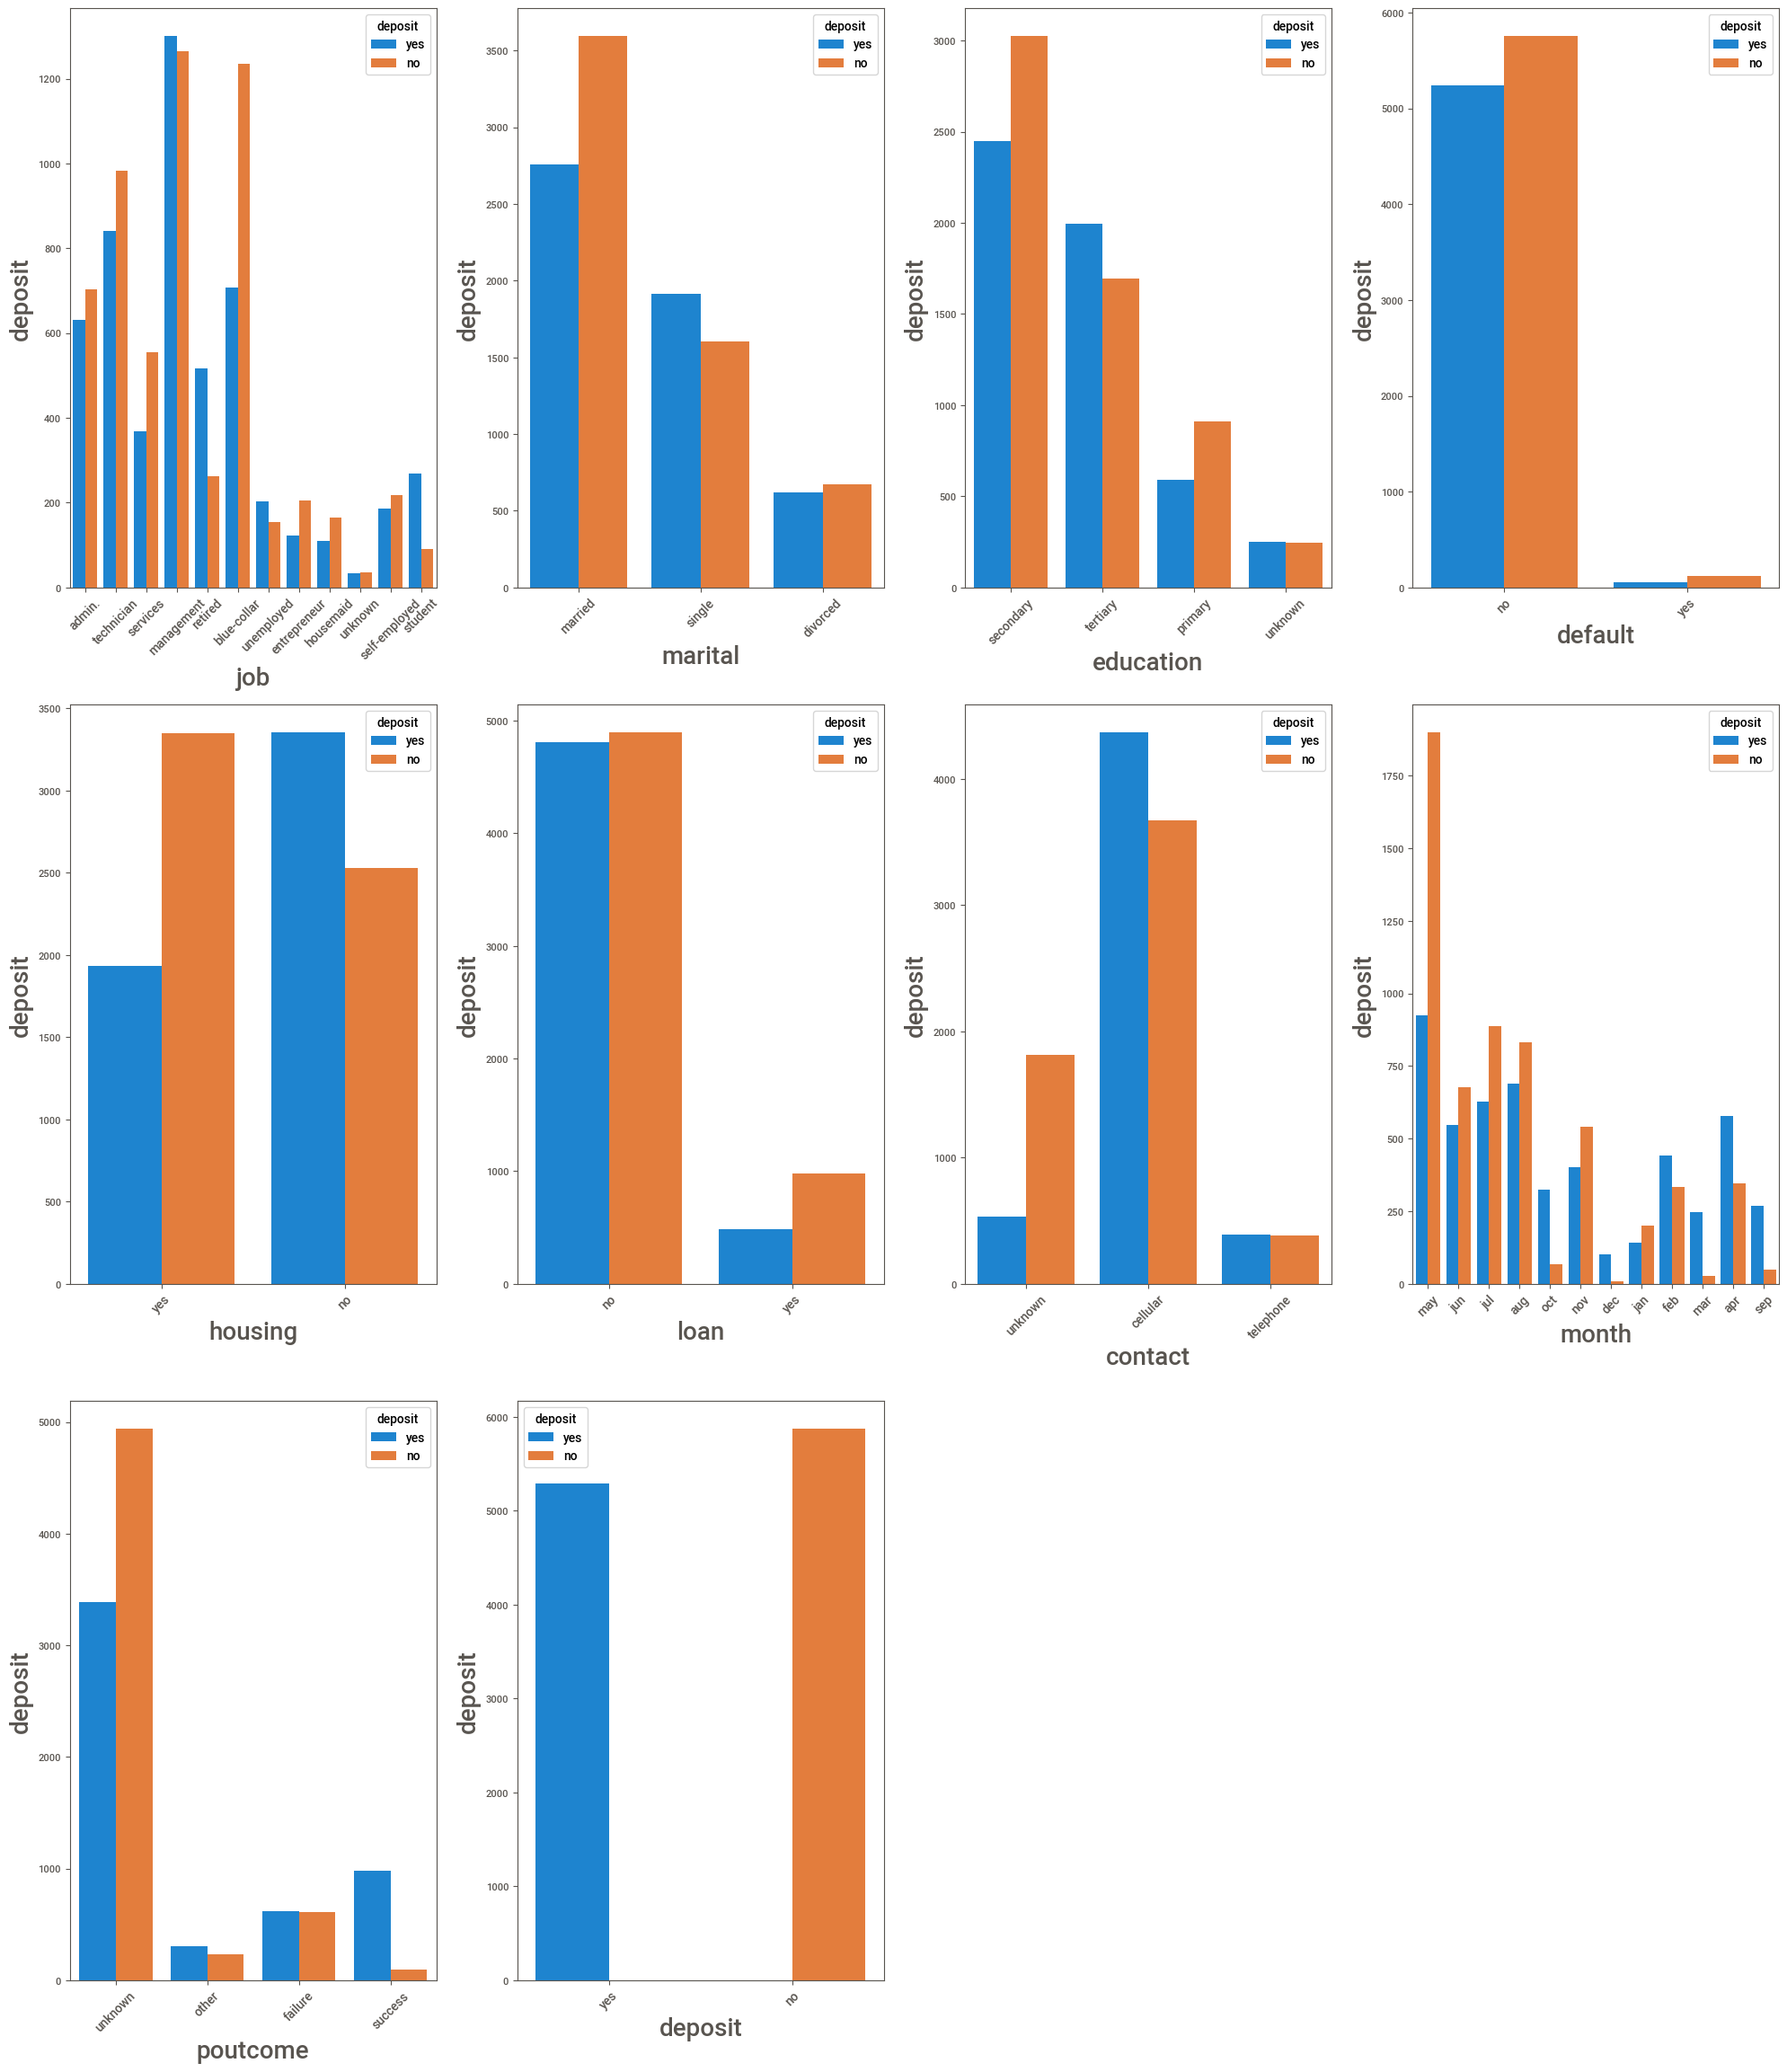

In [15]:
# Bivariate analysis for categorical columns

plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data2[column],hue=data.deposit)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('deposit',fontsize=20)
        plt.xticks(fontsize=10,rotation=45)
    plotnumber+=1
plt.tight_layout()

#### Encoding

In [16]:
data['deposit'] = data.deposit.replace({'yes':1,'no':0})

In [17]:
data['job'] = data.job.replace({'unknown':0,'housemaid':1,'entrepreneur':2,'unemployed':3,'student':4,'self-employed':5,'retired':6,'services':7,'admin.':8,'technician':9,'blue-collar':10,'management':11})

In [18]:
data['job'] = data.job.replace({'entrepreneur':2})

In [19]:
data['marital'] = data.marital.replace({'divorced':0,'single':1,'married':2})

In [20]:
data['education'] = data.education.replace({'unknown':0,'primary':1,'tertiary':2,'secondary':3})

In [21]:
data['default'] = data.default.replace({'yes':1,'no':0})

In [22]:
data['housing'] = data.housing.replace({'yes':1,'no':0})

In [23]:
data['loan'] = data.loan.replace({'yes':1,'no':0})

In [24]:
data['contact'] = data.contact.replace({'unknown':0,'telephone':1,'cellular':2})    # unknown column has 8042 entries and telephone has 774

In [25]:
data['month'] = data.month.replace({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})

In [26]:
data['poutcome'] = data.poutcome.replace({'unknown':0,'other':1,'failure':2,'success':3})          #unknown    8326
                                                                                                   #failure    1228
                                                                                                   #success    1071
                                                                                                   #other       537

In [27]:
# encoded data
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,8,2,3,0,2343,1,0,0,5,4,1042,1,-1,0,0,1
1,56,8,2,3,0,45,0,0,0,5,4,1467,1,-1,0,0,1
2,41,9,2,3,0,1270,1,0,0,5,4,1389,1,-1,0,0,1
3,55,7,2,3,0,2476,1,0,0,5,4,579,1,-1,0,0,1
4,54,8,2,2,0,184,0,0,0,5,4,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,10,1,1,0,1,1,0,2,20,3,257,1,-1,0,0,0
11158,39,7,2,3,0,733,0,0,0,16,5,83,4,-1,0,0,0
11159,32,9,1,3,0,29,0,0,2,19,7,156,2,-1,0,0,0
11160,43,9,2,3,0,0,0,1,2,8,4,9,2,172,5,2,0


<Axes: >

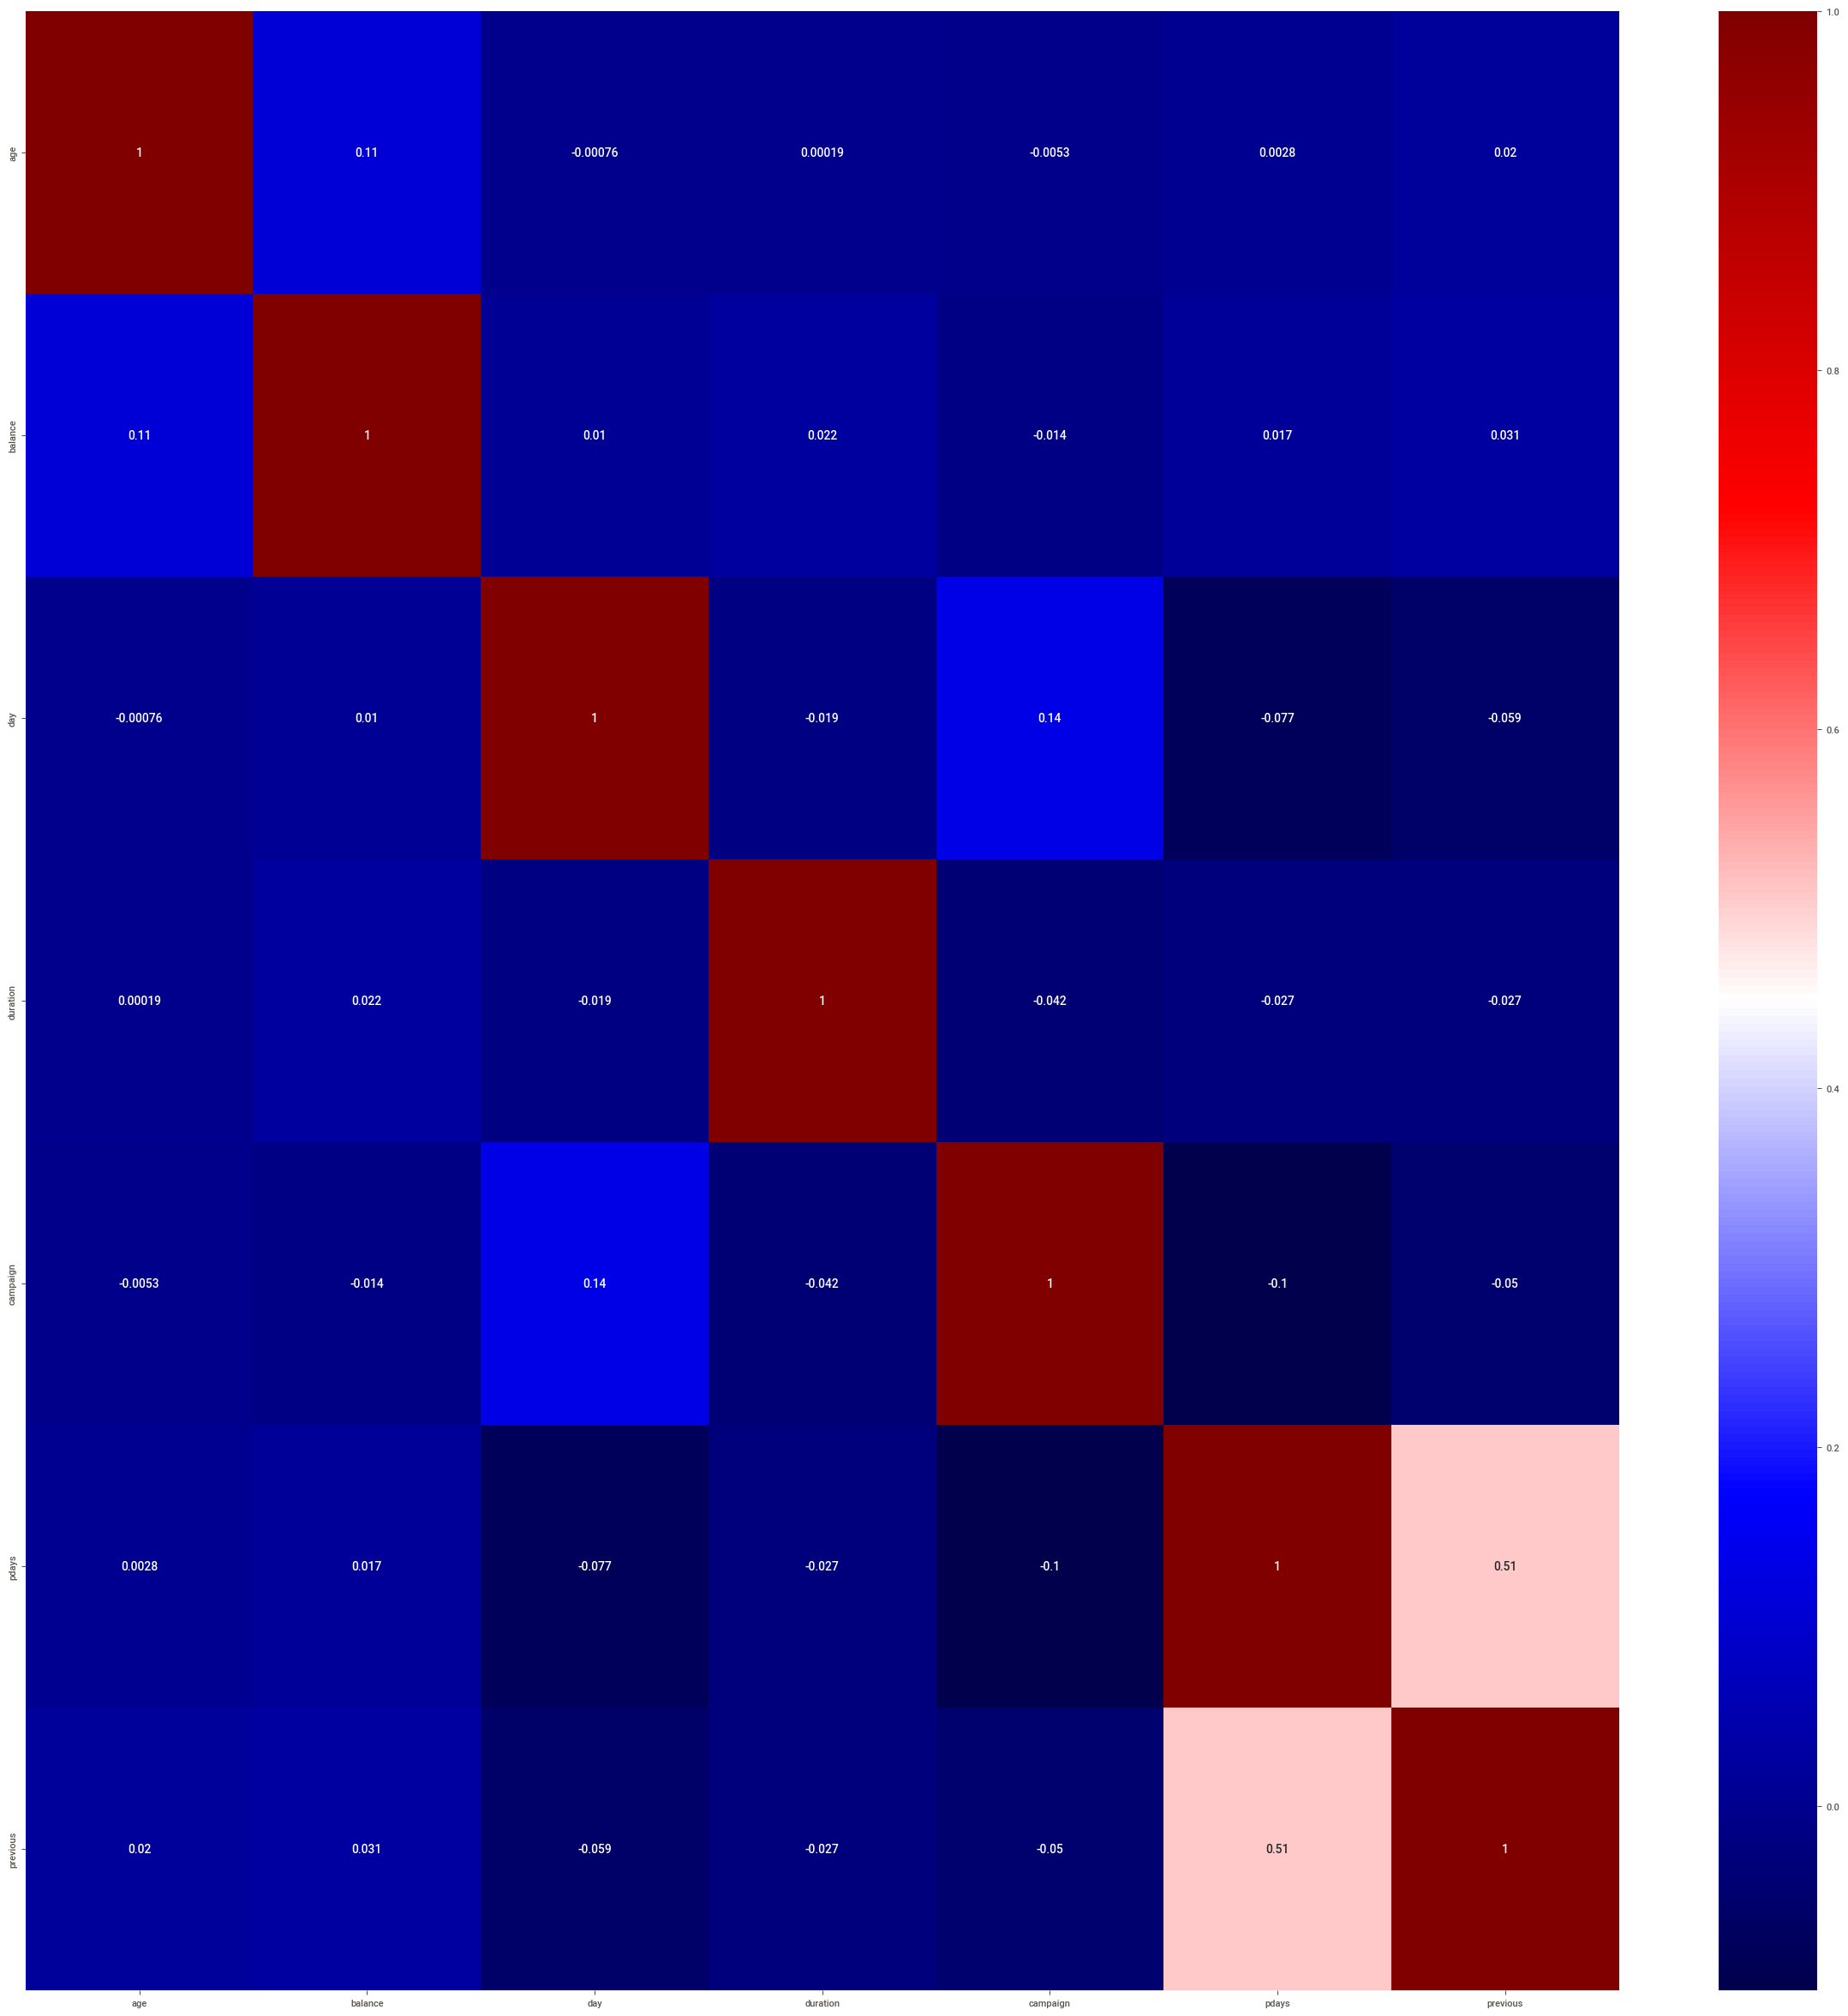

In [28]:
plt.figure(figsize=(30,30))
sns.heatmap(data1.corr(),annot=True,cmap='seismic',annot_kws={'size':10})

#### Splitting the data

In [29]:
X = data.drop('deposit',axis=1)
y = data.deposit

In [30]:
## Train-test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=14)

In [31]:
y_train.value_counts()

0    4712
1    4217
Name: deposit, dtype: int64

In [32]:
# since the data is slightly imbalanced, we are balancing the training data using SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_sm,y_train_sm = smote.fit_resample(x_train,y_train)

In [33]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

Counter({0: 4712, 1: 4217})
Counter({1: 4712, 0: 4712})


#### Model implementation

In [34]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier()

In [35]:
y_pred = model_dt.predict(x_test)

#### Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
accuracy_score(y_test,y_pred)

0.7863860277653381

In [38]:
pd.crosstab(y_test,y_pred)

col_0,0,1
deposit,,
0,936,225
1,252,820


#### Hyperparameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini","entropy"),  #quality of split
    "max_depth":(list(range(1,30))),  # depth of tree range from 1 to 19
    "min_samples_split":[2,3,4],      # min no of samples required to split internal node
    "min_samples_leaf":list(range(1,25)),    # min no of samples required to be at a leaf node
}

tree_clf = DecisionTreeClassifier(random_state=3)   # object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf,params,scoring='f1',n_jobs=-1,verbose=1,cv=3)

tree_cv.fit(x_train_sm,y_train_sm)  # training data on gridsearch cv
best_params = tree_cv.best_params_  # it will give you best parameters
print(f"Best parameters: {best_params}")  # print best parameters



Fitting 3 folds for each of 4176 candidates, totalling 12528 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 23, 'min_samples_split': 2}


In [40]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth= 8, min_samples_leaf=13, min_samples_split= 2)

In [41]:
model.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=13)

In [42]:
y_pred_dt = model.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred_dt)

0.8163905060456784

In [44]:
pd.crosstab(y_test,y_pred_dt)

col_0,0,1
deposit,,
0,922,239
1,171,901


In [45]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1161
           1       0.79      0.84      0.81      1072

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233

